# 03 — Simple Linear Regression from Scratch (NumPy Only)

In this notebook, we will:
- Derive the formula for the optimal line
- Implement the least squares method manually using NumPy
- Visualize the result and calculate performance metrics

## Step 1: Import Libraries

We use:
- NumPy for linear algebra operations
- Matplotlib and Seaborn for visualization

In [2]:
# ✅ Step 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (6, 3)

## Step 2: Create Synthetic Data

We simulate a true linear relationship `y = 3x + 4` with added Gaussian noise.

In [3]:
# ✅ Step 2: Generate Synthetic Data
np.random.seed(42)
X = np.linspace(0, 10, 50)
noise = np.random.normal(0, 2, X.shape)
y = 3 * X + 4 + noise

## Step 3: Reshape Data

We reshape `X` and `y` to column vectors to match matrix multiplication rules.

In [4]:
# ✅ Step 3: Reshape X for matrix operations
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

## Step 4: Add Bias Term

To compute `y = θ₀ + θ₁x`, we include a column of 1s to represent the intercept θ₀.
Now the equation becomes:

\[
\hat{y} = X_b \cdot \theta
\]

In [5]:
# ✅ Step 4: Add Bias Term (Intercept)
X_b = np.hstack([np.ones_like(X), X])  # Add column of 1s for intercept term

## Step 5: Compute Parameters (θ₀, θ₁)

We use the **Normal Equation**:

\[
\theta = (X^T X)^{-1} X^T y
\]

This gives us the best-fit parameters without iterative training.

In [6]:
# ✅ Step 5: Calculate Optimal Parameters Using Normal Equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.12888618],
       [2.8840332 ]])

## Step 6: Make Predictions

Using the learned θ values, we calculate predicted `y` values for each input.

In [7]:
# ✅ Step 6: Make Predictions
y_pred = X_b.dot(theta_best)

## Step 7: Visualize Best Fit Line

We now overlay the regression line calculated using the **Normal Equation** on top of the data to visualize the fit.

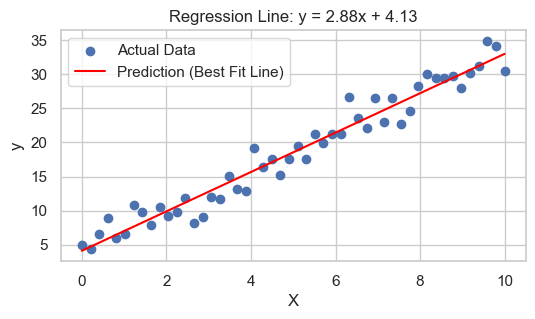

In [8]:
# ✅ Step 7: Visualize Fit
plt.scatter(X, y, label='Actual Data')
plt.plot(X, y_pred, color='red', label='Prediction (Best Fit Line)')
plt.title(f"Regression Line: y = {theta_best[1][0]:.2f}x + {theta_best[0][0]:.2f}")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## Step 8: Calculate R² Score

The R² score tells us how well our model explains the variance in the data:

\[
R^2 = 1 - \frac{\text{SS}_{res}}{\text{SS}_{total}}
\]

A score close to **1.0** means excellent fit.

In [9]:
# ✅ Step 8: Evaluate Model (R² Score)
ss_total = np.sum((y - np.mean(y))**2)
ss_res = np.sum((y - y_pred)**2)
r2_score = 1 - (ss_res / ss_total)
print(f"R² Score: {r2_score:.4f}")

R² Score: 0.9563
